In [1]:
from sympy import *
init_printing()

In [2]:
n=symbols('n', integer=True)
y=Function('y', integer=True)
x=Function('x', integer=True)

In [3]:
z=symbols('z')
zkernal=z**(-n); zkernal

In [4]:
def ZTransDef(f, n, LB=-oo, UB=oo):
    """
    Function to incapsolte the function f in the Z Transform
    Args:
        f: sympy expsersion to be ZTransformed
        n: dummy index varible
        LB: lower bound of the Z Transrom summation
        UB: upper bound of the Z Transrom summation

    
    """
    return Sum(f*zkernal.subs(n, n), (n, LB, UB))

# Raw testing

In [5]:
TestEq=Eq(y(n+1)-3*y(n), 4); TestEq

In [6]:
BC={y(0):1}; BC

In [7]:
KnownSol=rsolve(TestEq, y(n), BC); KnownSol

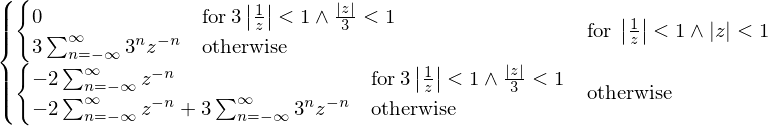

In [8]:
simplify(ZTransDef(KnownSol, n).doit(conds='none'))
#the conds='none' needs to have a way for findging the min, max bounds
#of the ROC

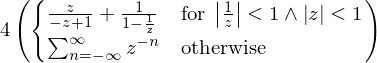

In [9]:
ZTR=ZTransDef(TestEq.rhs, n).doit(conds='none'); ZTR
#sympy needs to add conds='none' to sum

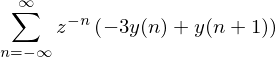

In [10]:
ZTL=ZTransDef(TestEq.lhs, n); ZTL

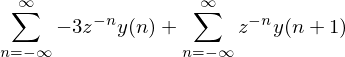

In [11]:
ZTL=expand(ZTL); ZTL

In [12]:
ZTLFs=list(ZTL.atoms(Function)); ZTLFs

In [13]:
ZTLFsArgs=[i.args for i in ZTLFs]; ZTLFsArgs

In [14]:
Y=Function('Y')
sups=[Y(z), z*Y(z)+z*y(0)]
Sups={i:j for i, j in zip(ZTLFs, sups)}; Sups

In [15]:
#ZTL.subs(y(n+1), z*Y(z)/zkernal)
#sympy I have no Idea why this exspection was raised

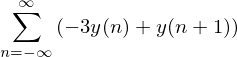

In [16]:
ZTL=simplify(ZTL/zkernal); ZTL

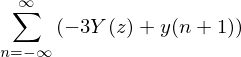

In [17]:
ZTL=ZTL.subs(y(n), Y(z)).doit(); ZTL

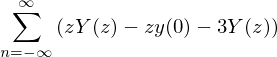

In [18]:
ZTL=ZTL.subs(y(n+1), z*Y(z)-z*y(0)); ZTL

In [19]:
ZTL.doit()

In [20]:
Sum(1, (n, -oo, oo)).doit()
#sympy: this should be 1 since there is no index inside the sum

In [21]:
ZTL=simplify(ZTL).subs(Sum(1, (n, -oo,oo)), 1).doit(); ZTL

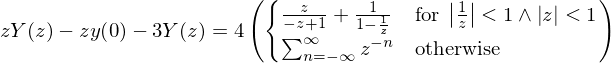

In [22]:
ZT=Eq(ZTL, ZTR); ZT

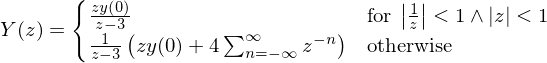

In [23]:
ZTF=Eq(Y(z), solve(ZT, Y(z))[0]); ZTF

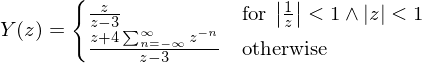

In [24]:
ZTF=ZTF.subs(BC); ZTF

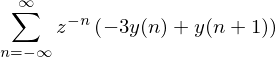

In [25]:
ZTL=ZTransDef(TestEq.lhs, n); ZTL

# Devlopement of Shifting

In [26]:
k=symbols('k', integer=True)

In [27]:
Sum(y(k)*zkernal.subs(n, k), (k, 0, 0)).doit()

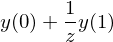

In [28]:
Sum(y(k)*zkernal.subs(n, k), (k, 0, 1)).doit()

In [29]:
Sum(y(k)*zkernal.subs(n, k), (k, 0, -1)).doit()

In [30]:
Sum(y(k)*zkernal.subs(n, k), (k, 0, -2)).doit()

In [31]:
ShiftBound=1
z**(ShiftBound)*(Y(z)-Sum(y(k)*zkernal.subs(n, k), (k, 0, ShiftBound-1)).doit())

In [32]:
def zShift(z, y, Y, ShiftBound):
    """
    Functiont to generate the Right and Left Z Shift property of Z transfrom
    Args:
        z(sympy symbol): Z transfrom z symbol
        y(sympy Function): discrate "time" Function being transformed from
        Y(sympy Function): discrate Z domian Function that y transfroms into
        
    """
    return simplify(z**(ShiftBound)*(Y(z)-Sum(y(k)*zkernal.subs(n, k), (k, 0, ShiftBound-1)).doit()))

zShift(z, y,Y, 2)

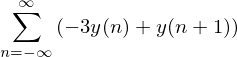

In [33]:
ZTL=simplify(ZTL/zkernal); ZTL

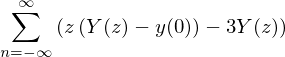

In [34]:
ZTL=ZTL.subs(y(n), zShift(z, y,Y, 0)).subs(y(n+1), zShift(z, y,Y, 1))
ZTL

In [35]:
simplify(ZTL).subs(Sum(1, (n, -oo, oo)), 1).doit()

# AutoGen Shift

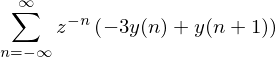

In [36]:
ZTL=ZTransDef(TestEq.lhs, n); ZTL

In [37]:
ZTLFs=list(ZTL.atoms(Function)); ZTLFs

In [38]:
F1=ZTLFs[0]; F2=ZTLFs[1]; F1, F2

There should be a way get get $y$ from $y(n)$ but I cant figure it out; would then like to have a way to create $Y$ from $y$

In [39]:
F1.args[0].subs(n, 0), F2.args[0].subs(n, 0)

In [40]:
zShift(z, y, Y, 0), zShift(z, y, Y, 1)

In [41]:
Sups={i: zShift(z, y, Y, i.args[0].subs(n, 0)) for i in ZTLFs}
Sups

# Working Z Transfrom Process Test

Set up discrate "time" equation

In [42]:
TestEq2=Eq(3*n*y(n+2)-n*y(n-3)+y(n)-7*n, 2*x(n+1)-x(n)+8*n); TestEq2

call `ZTransDef` on each side respecftly, assuming that each side contains a single function

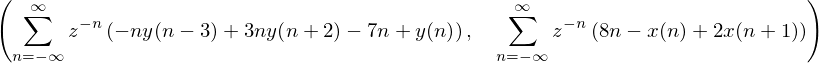

In [43]:
ZTL=ZTransDef(TestEq2.lhs, n); ZTR=ZTransDef(TestEq2.rhs, n)
ZTL, ZTR

In [44]:
ZTLFs=list(ZTL.atoms(Function)); ZTRFs=list(ZTR.atoms(Function)); 
ZTLFs, ZTRFs

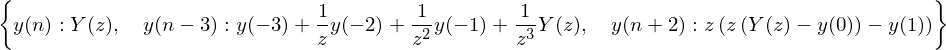

In [45]:
SupsL={i: zShift(z, y, Y, i.args[0].subs(n, 0)) for i in ZTLFs}
SupsL

In [46]:
X=Function('X')
SupsR={i: zShift(z, x, X, i.args[0].subs(n, 0)) for i in ZTRFs}
SupsR

In [47]:
RSups={}
for i in expand(ZTR).args:
    if list(i.atoms(Function))!=[]:
        key=list(i.atoms(Function))[0]
        val=zShift(z, x, X, list(list(i.atoms(Function))[0].args)[0].subs(n, 0))

        RSups[key]=val/zkernal
RSups

## Linch Pin
if this `ValueError: substitution can not create dummy dependencies
` in starting on line 320 in `sympy/concrete/expr_with_limits.py` this would be done

In [48]:
#ZTR.subs(RSups)
#!!!!!!!!if this value Error was not being trigured this would be done

# ZTransfrom Test on common functions listed no Z Tranfrom tables

https://en.wikipedia.org/wiki/Z-transform#Table_of_common_Z-transform_pairs

## Delta

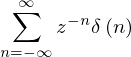

In [49]:
TF=ZTransDef(DiracDelta(n), n); TF

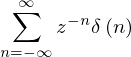

In [50]:
TF.doit()

## Step Function

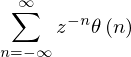

In [58]:
TF=ZTransDef(Heaviside(n), n); TF

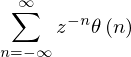

In [59]:
TF.doit()

## Piecewise

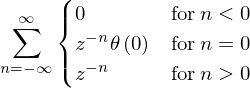

In [61]:
TF.rewrite(Piecewise).doit()

## cos

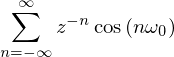

In [53]:
radFreq=symbols('omega_0')
TF=ZTransDef(cos(radFreq*n), n); TF

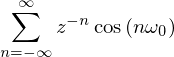

In [54]:
TF.doit()